<a href="https://colab.research.google.com/github/bipulsin/ML-Projects/blob/main/CovidTracker_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

Get the data from Covid tracking data.
This URL data source can be changed to use this program to find Covid tracking for different countries of globally.

In [ ]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [ ]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

Formatting the date
Dropping the not required column
State data is converted to String for bettter representation


In [ ]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df.drop(['dateChecked'],axis=1,inplace=True)
df['state']=df['state'].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         20780 non-null  datetime64[ns]
 1   state                        20780 non-null  object        
 2   positive                     20584 non-null  float64       
 3   probableCases                9218 non-null   float64       
 4   negative                     13274 non-null  float64       
 5   pending                      2139 non-null   float64       
 6   totalTestResultsSource       20780 non-null  object        
 7   totalTestResults             20614 non-null  float64       
 8   hospitalizedCurrently        17338 non-null  float64       
 9   hospitalizedCumulative       12891 non-null  float64       
 10  inIcuCurrently               11534 non-null  float64       
 11  inIcuCumulative              3792 non-nul

In [ ]:
df.fillna(value=-1, inplace=True)
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,-1.0,-1.0,-1.0,totalTestsViral,1731628.0,33.0,1293.0,-1.0,-1.0,2.0,-1.0,-1.0,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,-1.0,1731628.0,68693.0,1660758.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,0,0,56886,0,56886,-1.0,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,-1.0
1,2021-03-07,AL,499819.0,107742.0,1931711.0,-1.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,-1.0,2676.0,-1.0,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,-1.0,-1.0,-1.0,-1.0,392077.0,7963.0,2185.0,-1.0,2323788.0,-1.0,-1.0,-1.0,119757.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,408,2087,2431530,2347,2431530,-1.0,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,-1.0
2,2021-03-07,AR,324818.0,69092.0,2480716.0,-1.0,totalTestsViral,2736442.0,335.0,14926.0,141.0,-1.0,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,-1.0,2736442.0,-1.0,2480716.0,255726.0,4308.0,1011.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,481311.0,81803.0,-1.0,-1.0,5,165,3267,2805534,3380,2805534,-1.0,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,-1.0
3,2021-03-07,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,-1.0,-1.0,2140.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60,0,0,2140,0,2140,-1.0,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,-1.0
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,-1.0,totalTestsViral,7908105.0,963.0,57907.0,273.0,-1.0,143.0,-1.0,-1.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,7908105.0,-1.0,-1.0,769935.0,14403.0,1925.0,-1.0,3842945.0,580569.0,-1.0,-1.0,444089.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,1335,13678,3899464,45110,3899464,-1.0,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,-1.0


Function to plot a bar chart of given data

In [ ]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

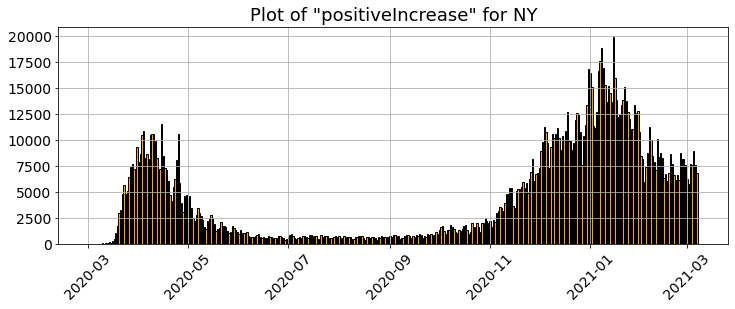

In [ ]:
plot_var()

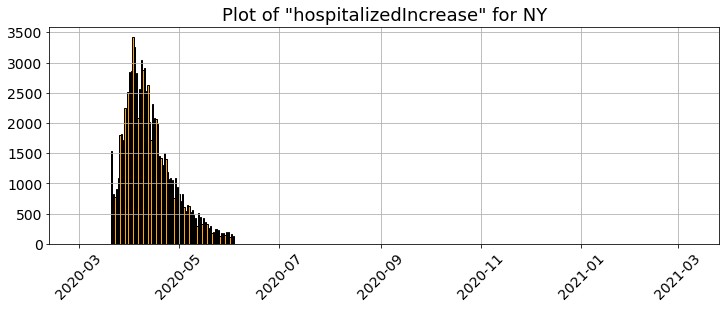

In [ ]:
plot_var('hospitalizedIncrease','NY')

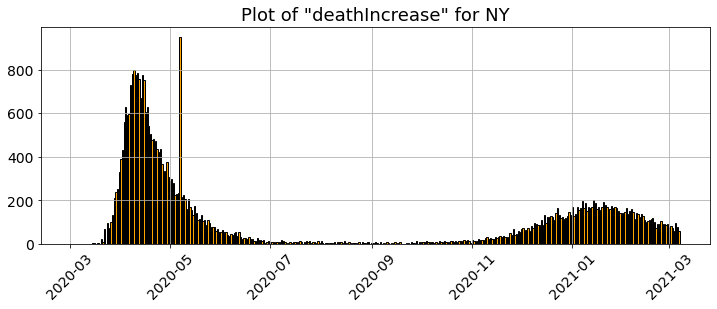

In [ ]:
plot_var('deathIncrease','NY')

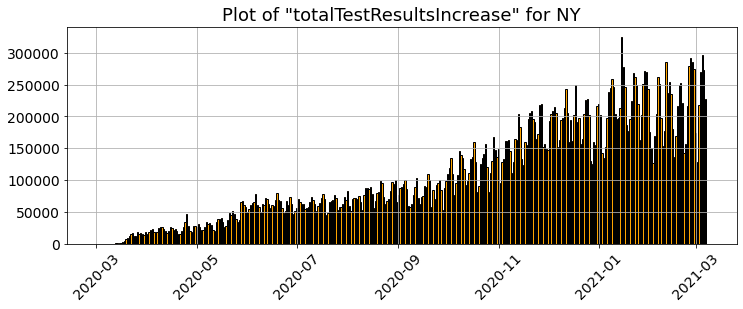

In [ ]:
plot_var('totalTestResultsIncrease','NY')

Testing tracker function

Testing is crucially important to track the spread of the virus and contain it. Let us see how states the doing on this aspect relatively.

In [ ]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA','MI','GA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

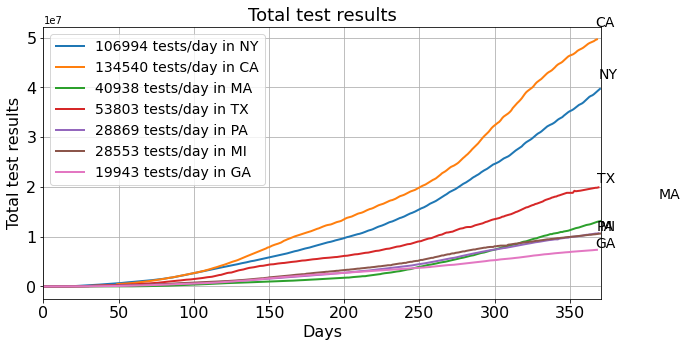

In [ ]:
plotTesting()

**14 days of decreasing case counts**

In [ ]:
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

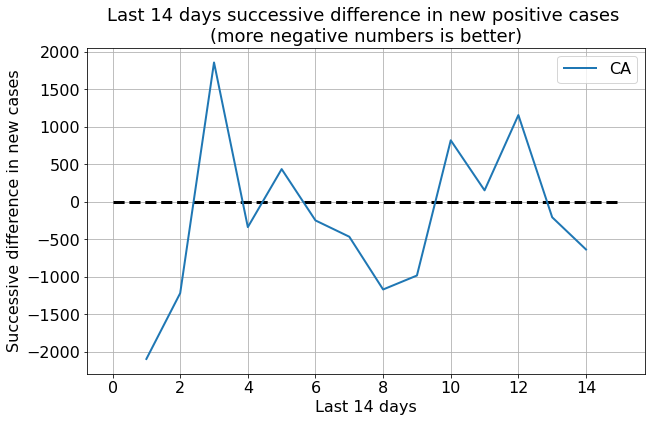

In [ ]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()